In [1]:
%matplotlib notebook
from __future__ import division
import numpy as np
from focustest import Image
import glob
import os
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
from scipy.optimize import curve_fit
from scipy.special import erf
from scipy import ndimage
from scipy import misc
#import opticspy
from matplotlib import cm


In [3]:
dir = '/Users/vincent/Nextcloud/FIREBALL/Tests-at-FortSumner/170923_Autocoll2/170923/Sudo_focus_test/'
cat = Table.read(dir+'image000176_table_grid.csv')

In [4]:
#n=10
#cat['ray'] = 0
#cat.sort('xcentroid')
#cat = cat[::-1]
#for psf in cat:
#    x202 = psf['xcentroid']
#    y202 = psf['ycentroid']
#    mask206 = (cat['xcentroid']>x202-171-n) & (cat['xcentroid']<x202-171+n) & (cat['ycentroid']>y202-n) & (cat['ycentroid']<y202+n)
#    mask213 = (cat['xcentroid']>x202-527-n) & (cat['xcentroid']<x202-527+n) & (cat['ycentroid']>y202-n) & (cat['ycentroid']<y202+n)
#    if len(cat[mask206])==1 :#& len(cat[mask213])==1:
#        x206 = cat[mask206]['xcentroid'][0]
#        y206 = cat[mask206]['ycentroid'][0]
#        x213 = cat[mask213]['xcentroid'][0]
#        y213 = cat[mask213]['ycentroid'][0]
#        print 'yes'
#        print -(x213-x206)/(213.9-206.2),-(x206-x202)/(206.2-202.5)

In [38]:
n=2
cat['ray'] = 0
cat.sort('xcentroid')
cat = cat[::-1]
disp1 = []
disp2 = []
disp3 = []
x1 = []
x2 = []
y1 = []
y2 = []
x3 = []
y3 = []
for psf in cat:
    x206 = psf['xcentroid']
    y206 = psf['ycentroid']
    id206 = psf['id']
    mask202 = (cat['xcentroid']>x206+171-n) & (cat['xcentroid']<x206+171+n) & (cat['ycentroid']>y206-n) & (cat['ycentroid']<y206+n)
    mask213 = (cat['xcentroid']>x206-357-n) & (cat['xcentroid']<x206-357+n) & (cat['ycentroid']>y206-n) & (cat['ycentroid']<y206+n)
    if len(cat[mask213])==1:
        id =  np.where(cat['id'] == cat[mask213]['id'])[0][0]
        cat['ray'][cat['id']==id] = 213
        cat['ray'][cat['id']==id206] = 206
        
        x213 = cat[mask213]['xcentroid'][0]
        y213 = cat[mask213]['ycentroid'][0]
        x1.append((x213+x206)/2)
        y1.append((y213+y206)/2)
        disp1.append(-(x213-x206)/(213.9-206.2))
#        print -(x213-x206)/(213.9-206.2)
    if len(cat[mask202])==1:
        id =  np.where(cat['id'] == cat[mask202]['id'])[0][0]
        cat['ray'][cat['id']==id] = 202
        cat['ray'][cat['id']==id206] = 206
        
        x202 = cat[mask202]['xcentroid'][0]
        y202 = cat[mask202]['ycentroid'][0]
        x2.append((x202+x206)/2)
        y2.append((y202+y206)/2)
        disp2.append(-(x206-x202)/(206.2-202.5))
#        print -(x206-x202)/(206.2-202.5)        
#    if (len(cat[mask202])==1) & (len(cat[mask213])==1):
#        id =  np.where(cat['id'] == cat[mask202]['id'])[0][0]
#        cat['ray'][cat['id']==id] = 202
#        cat['ray'][cat['id']==id206] = 206
        
#        x202 = cat[mask202]['xcentroid'][0]
#        y202 = cat[mask202]['ycentroid'][0]
#        x213 = cat[mask213]['xcentroid'][0]
#        y213 = cat[mask213]['ycentroid'][0] 
#        x3.append((x202+x213)/2)
#        y3.append((y202+y213)/2)
#        disp3.append(-(x213-x202)/(213.9-202.5))
#        print -(x213-x202)/(213.9-202.5)       

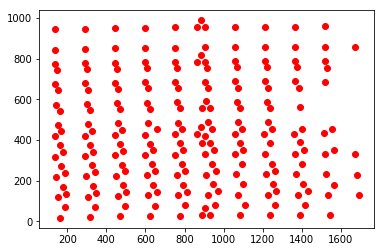

In [46]:
plt.plot(cat['ycentroid'],cat['xcentroid'],'ro')



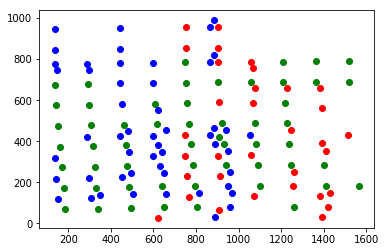

In [45]:
plt.plot(cat[cat['ray']==213]['ycentroid'],cat[cat['ray']==213]['xcentroid'],'ro')
plt.plot(cat[cat['ray']==206]['ycentroid'],cat[cat['ray']==206]['xcentroid'],'go')
plt.plot(cat[cat['ray']==202]['ycentroid'],cat[cat['ray']==202]['xcentroid'],'bo')

In [ ]:
    if len(cat[mask202])==1:
        cat[mask202]['ray'] = 202
        cat[cat['xcentroid']==x206]['ray'] = 206
        
        x202 = cat[mask202]['xcentroid'][0]
        y202 = cat[mask202]['ycentroid'][0]
        x2.append((x202+x206)/2)
        y2.append((y202+y206)/2)
        disp2.append(-(x206-x202)/(206.2-202.5))
#        print -(x206-x202)/(206.2-202.5)        
    if (len(cat[mask202])==1) & (len(cat[mask213])==1):
        cat[mask202]['ray'] = 202
        cat[mask213]['ray'] = 213
        cat[cat['xcentroid']==x206]['ray'] = 206
        
        x202 = cat[mask202]['xcentroid'][0]
        y202 = cat[mask202]['ycentroid'][0]
        x213 = cat[mask213]['xcentroid'][0]
        y213 = cat[mask213]['ycentroid'][0] 
        x3.append((x202+x213)/2)
        y3.append((y202+y213)/2)
        disp3.append(-(x213-x202)/(213.9-202.5))
#        print -(x213-x202)/(213.9-202.5)  

In [14]:
print cat

 id     xcentroid          ycentroid      ... Encircled_energy_30 ray
--- ------------------ ------------------ ... ------------------- ---
128  989.6061349147739  884.8563834497718 ...  2.6457513110645907   0
223  959.1261116132806 1517.7012396675802 ...   2.449489742783178   0
202  958.7849013097085 1363.8305752210856 ...   2.449489742783178   0
181  958.3056982975177 1211.0197292888665 ...   2.449489742783178   0
162  957.7770494827189  1057.686865808738 ...  2.6457513110645907   0
135  956.4830245455141  904.2637734300723 ...   2.449489742783178   0
125  956.0962010517753  866.1718974418516 ...   2.449489742783178   0
105  954.9446763447208   751.187430519386 ...   2.449489742783178   0
 83  953.4203382735087  597.4742831353454 ...   2.449489742783178   0
 60  951.1513145585972 444.14572962808677 ...   2.449489742783178   0
...                ...                ... ...                 ... ...
209  31.65590841248038 1390.5873847842831 ...  2.6457513110645907   0
189  31.135846527639

In [6]:
xx,yy = np.meshgrid(x1,y1)
np.array(yy).shape
#len(disp3)
#print disp3

(47, 47)

In [7]:
n=10
a = 100
b = 800#900
c = 100
d = 1500#1600
x = np.linspace(a,b,n)
y = np.linspace(c,d,n)
xx, yy = np.meshgrid(x,y)
disp = np.zeros((n,n))
disp_ = np.zeros((n,n))
#disp[i]
x1 = np.concatenate((x1,x2,x3))
y1 = np.concatenate((y1,y2,y3))
disp1 = np.concatenate((disp1,disp2,disp3))

In [8]:
for k in range(len(x1)):   
    for i in range(n):
        for j in range(n):
            if (x1[k]>x[i]) &  (x1[k]<x[i] + (b-a)/(n-1)) & (y1[k]>y[j]) &  (y1[k]<y[j] + (d-c)/(n-1)):
                disp[i,j] = disp1[k]
                
                

In [9]:
for k in range(len(x1)):   
    for i in range(n):
        for j in range(n):
            area = ((x1>x[i]) &  (x1<x[i] + (b-a)/(n-1)) & (y1>y[j]) &  (y1<y[j] + (d-c)/(n-1)))
            if area.any() == True:
                disp_[i,j] = np.mean(np.array(disp1[area]))
#((x1<0) & (y1<16600)).all() == True

#x,y,(b-a)/(n-1), (d-c)/(n-1)
#plt.figure()
#plt.scatter(np.array(x1),np.array(y1),c=np.array(disp1))
#plt.scatter(x2,y2,c=disp2)
#plt.colorbar()
#plt.show()  


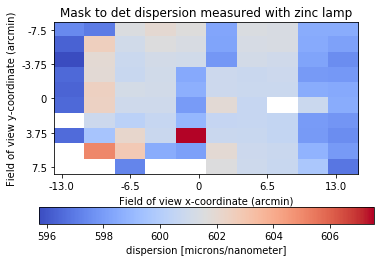

In [11]:
dispb = np.zeros((2*n,n))
for i in range(n):
    dispb[2*i,:] = disp[i,:]
    dispb[2*i+1,:] = disp[i,:]



#print disp
dispb[dispb==0] = np.nan
plt.figure()
plt.title('Mask to det dispersion measured with zinc lamp')
plt.imshow(13*dispb.T,cmap='coolwarm')#cm.PRGn)#,vmin=45.9, vmax=46.5)cmap='inferno'
#plt.scatter(np.array(x1),np.array(y1),'o')
#plt.yticks(np.arange(n),x.astype(int))
#plt.xticks(np.arange(n),y.astype(int))
plt.xlabel('Field of view x-coordinate (arcmin)' )
plt.ylabel('Field of view y-coordinate (arcmin)')
plt.yticks(np.linspace(0,9,5),[-450/60,-225/60,0,225/60,450/60])
plt.xticks(np.linspace(0,18,5),[-780/60,-390/60,0,390/60,780/60])
cb = plt.colorbar(orientation='horizontal')
cb.set_label("dispersion [microns/nanometer]")
plt.show()


In [12]:
13*disp1

array([602.28900121, 602.62043372, 602.19885456, 602.07962095,
       601.95832686, 602.23606656, 602.02687859, 602.39530013,
       602.73793751, 602.88526961, 602.71816405, 601.94747856,
       602.10992115, 601.95842008, 601.59352116, 601.87822962,
       601.97246587, 602.19875844, 602.56448888, 602.7036373 ,
       602.85181221, 601.86378805, 601.52329537, 602.37221348,
       602.33890549, 602.65632885, 602.85618087, 602.98204785,
       602.00456293, 601.61942882, 602.39532202, 602.81450065,
       602.71739533, 602.75475278, 603.20632257, 603.74113282,
       604.74954941, 605.08344611, 600.92284082, 602.43218941,
       599.56186789, 602.43055629, 602.47236395, 601.90155463,
       601.93846887, 602.58056248, 603.26627818, 597.943892  ,
       596.91770583, 597.96010363, 597.56906168, 597.81417903,
       598.54713262, 597.78846046, 598.46599672, 597.89579515,
       597.55715739, 598.21714554, 598.58366934, 598.82557883,
       597.9616904 , 598.01020803, 599.69889327, 598.24

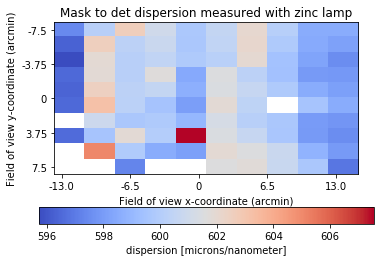

In [13]:
n=2
cat['ray'] = 0
cat.sort('xcentroid')
cat = cat[::-1]
disp1 = []
disp2 = []
disp3 = []
x1 = []
x2 = []
y1 = []
y2 = []
x3 = []
y3 = []
for psf in cat:
    x206 = psf['xcentroid']
    y206 = psf['ycentroid']
    mask202 = (cat['xcentroid']>x206+171-n) & (cat['xcentroid']<x206+171+n) & (cat['ycentroid']>y206-n) & (cat['ycentroid']<y206+n)
    mask213 = (cat['xcentroid']>x206-357-n) & (cat['xcentroid']<x206-357+n) & (cat['ycentroid']>y206-n) & (cat['ycentroid']<y206+n)
    if len(cat[mask213])==1:
        x213 = cat[mask213]['xcentroid'][0]
        y213 = cat[mask213]['ycentroid'][0]
        x1.append((x213+x206)/2)
        y1.append((y213+y206)/2)
        disp1.append(-(x213-x206)/(213.9-206.2))
#        print -(x213-x206)/(213.9-206.2)
    if len(cat[mask202])==1:
        x202 = cat[mask202]['xcentroid'][0]
        y202 = cat[mask202]['ycentroid'][0]
        x2.append((x202+x206)/2)
        y2.append((y202+y206)/2)
        disp2.append(-(x206-x202)/(206.2-202.5))
#        print -(x206-x202)/(206.2-202.5)        
    if (len(cat[mask202])==1) & (len(cat[mask213])==1):
        x202 = cat[mask202]['xcentroid'][0]
        y202 = cat[mask202]['ycentroid'][0]
        x213 = cat[mask213]['xcentroid'][0]
        y213 = cat[mask213]['ycentroid'][0] 
        x3.append((x202+x213)/2)
        y3.append((y202+y213)/2)
        disp3.append(-(x213-x202)/(213.9-202.5))
#        print -(x213-x202)/(213.9-202.5)       

n=10
a = 100
b = 800#900
c = 100
d = 1500#1600
x = np.linspace(a,b,n)
y = np.linspace(c,d,n)
xx, yy = np.meshgrid(x,y)
disp = np.zeros((n,n))
disp_ = np.zeros((n,n))
#disp[i]
x1 = np.concatenate((x1,x2,x3))
y1 = np.concatenate((y1,y2,y3))
disp1 = np.concatenate((disp1,disp2,disp3))


n=10
disp1=np.array(disp1)
for i in range(n):
    for j in range(n):
        area = ((x1>x[i]) &  (x1<x[i] + (b-a)/(n-1)) & (y1>y[j]) &  (y1<y[j] + (d-c)/(n-1)))
        if area.any() == True:
            disp_[i,j] = np.mean(disp1[area])
#            print x[i],y[i],13*np.mean(np.array(disp1[area])), 13*disp1[area]
                
dispb_ = np.zeros((2*n,n))
for i in range(n):
    dispb_[2*i,:] = disp_[i,:]
    dispb_[2*i+1,:] = disp_[i,:]




#print disp
dispb_[dispb_==0] = np.nan
plt.figure()
plt.title('Mask to det dispersion measured with zinc lamp')
plt.imshow(13*dispb_.T,cmap='coolwarm')#cm.PRGn)#,vmin=45.9, vmax=46.5)cmap='inferno'
#plt.scatter(np.array(x1),np.array(y1),'o')
#plt.yticks(np.arange(n),x.astype(int))
#plt.xticks(np.arange(n),y.astype(int))
plt.xlabel('Field of view x-coordinate (arcmin)' )
plt.ylabel('Field of view y-coordinate (arcmin)')
plt.yticks(np.linspace(0,9,5),[-450/60,-225/60,0,225/60,450/60])
plt.xticks(np.linspace(0,18,5),[-780/60,-390/60,0,390/60,780/60])
cb = plt.colorbar(orientation='horizontal')
cb.set_label("dispersion [microns/nanometer]")
plt.show()

                

In [14]:
n

10

In [15]:
blabla = np.array(disp1)
blabla[area]
len(blabla[area])

1

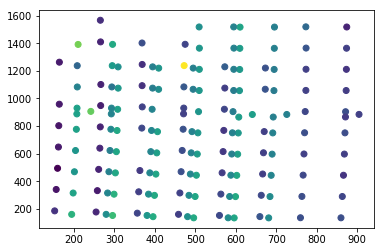

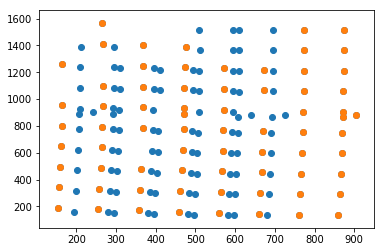

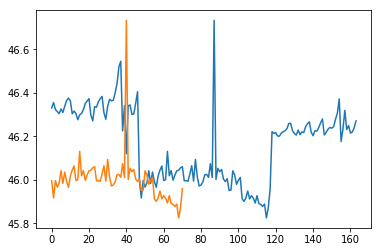

In [16]:
plt.figure()
plt.scatter(np.array(x1),np.array(y1),c=np.array(disp1))
#plt.scatter(x2,y2,c=disp2)
plt.show()  


plt.figure()
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.show()
plt.figure()
plt.plot(disp1)
plt.plot(disp2)
plt.show()

In [17]:
print x202[0]
plt.scatter(cat['xcentroid'],cat['ycentroid'])

IndexError: invalid index to scalar variable.